In [6]:
import pathlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [66]:
dataset = pd.read_csv('무Model.csv')
dataset = dataset.drop(['날짜'],axis=1)

In [67]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [68]:
font_path = "C:/Windows/Fonts/NanumSquareL.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


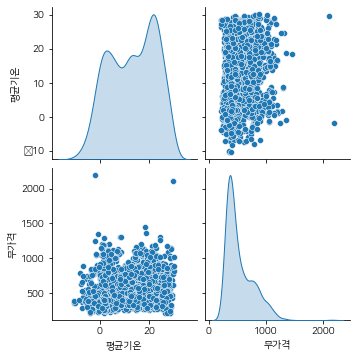

In [69]:
sns.pairplot(train_dataset[["평균기온","무가격"]], diag_kind="kde")

In [70]:
train_labels = train_dataset.pop('무가격')
test_labels = test_dataset.pop('무가격')

In [71]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
평균강수량,1735.0,3.365014,8.707346,0.00,0.000,0.10,1.900,101.90
최대강수량,1735.0,24.973948,44.692135,0.00,0.200,5.90,29.600,384.30
평균기온,1735.0,13.265360,9.480516,-10.40,5.050,13.90,21.600,30.20
최고기온,1735.0,18.745187,9.479610,-6.50,10.500,20.20,26.900,36.60
최저기온,1735.0,8.477752,9.899769,-14.60,-0.300,8.50,17.500,25.80
평균습도,1735.0,67.742363,13.220860,31.00,57.000,69.00,78.000,96.00
최저습도,1735.0,22.695101,13.148862,0.00,12.000,20.00,31.000,66.00
평균풍속,1735.0,1.901787,0.641178,0.90,1.400,1.70,2.200,5.10
최대풍속,1735.0,12.073602,4.210879,5.30,9.000,11.10,14.300,45.00
무거래량,1735.0,983.118242,495.720195,0.08,656.715,847.52,1232.355,4154.51


In [72]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [74]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [63]:
model = build_model()

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1728      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [65]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [52]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_data=(test_dataset, test_labels), verbose=0,
  callbacks=[PrintDot()])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,NaN,NaN,NaN,NaN,NaN,NaN,495
496,NaN,NaN,NaN,NaN,NaN,NaN,496
497,NaN,NaN,NaN,NaN,NaN,NaN,497
498,NaN,NaN,NaN,NaN,NaN,NaN,498
499,NaN,NaN,NaN,NaN,NaN,NaN,499
